In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
fpaths = "../testes_seq_paral/test_staub_tudo_test_new_n/"

sizes = ["small", "medium", "large"]
threads = [2, 4, 8, 16]
threads_mpi_pthreads = [4, 6, 8, 10, 12, 18]
speedups = []

In [6]:
sequenciais = []

for i in sizes:
    sequencial_local = []
    with open(f"{fpaths}logs_sequencial/log_seq_{i}_out.txt", "r") as arquivo:
        print(i)
        for linha in arquivo:
            if "seconds time elapsed" in linha:
                aux = linha.split("seconds")
                aux = aux[0]
                aux = float(aux.replace(",", "."))
                print(float(aux))
                sequencial_local.append(float(aux))
    print(len(sequencial_local))
    sequenciais.append(np.mean(sequencial_local))

small
6.191846495
6.17188241
6.175666009
6.170085696
6.196453253
5
medium
49.411392294
53.721440713
49.382335194
49.404977324
49.383345147
5
large
395.032510153
394.779526028
394.917783081
394.827077585
395.522817783
5


In [7]:
paralelos_pthread = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"pthreads - {i} threads {j}")
        with open(f"{fpaths}logs_paralelo/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_pthread.append(np.mean(paralelo_local))

pthreads - small threads 2
3.098658364
3.081807777
3.078644836
3.177409119
3.07633345
5
pthreads - small threads 4
1.69321962
1.6912847
1.691511317
1.694855706
1.712329977
5
pthreads - small threads 8
1.74936203
1.747585076
1.760482313
1.763716068
1.771654447
5
pthreads - small threads 16
1.807937135
1.803581848
1.810584721
1.925513078
2.341687708
5
pthreads - medium threads 2
28.371732916
28.231900213
28.265612026
28.141530559
28.248966196
5
pthreads - medium threads 4
18.307804554
18.372047782
18.325067972
18.364747003
18.328295867
5
pthreads - medium threads 8
18.672400532
18.429459629
18.579014268
18.408794682
18.3986245
5
pthreads - medium threads 16
18.499931211
18.714687686
18.610648588
18.62938849
18.468354474
5
pthreads - large threads 2
224.824484683
225.181067126
225.017660324
225.130687917
223.424863018
5
pthreads - large threads 4
147.607472561
147.645521306
148.380415747
162.434486657
166.697925686
5
pthreads - large threads 8
155.98157128
150.142309081
149.669427347
148.

In [8]:
paralelos_mpi = []

for i in sizes:
    for j in threads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_mpi/log_paralelo_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        paralelos_mpi.append(np.mean(paralelo_local))

mpi - small threads 2
3.838342385
3.832783509
3.833112914
3.829079425
3.827701146
5
mpi - small threads 4
2.689872148
2.636106574
2.694498197
2.662412281
2.635911986
5
mpi - small threads 8
2.83733568
2.867571354
2.824089462
2.791714079
2.830845851
5
mpi - small threads 16
5.068240674
4.832123991
4.819755816
4.748257044
5.104149297
5
mpi - medium threads 2
28.813279174
28.57054451
28.80577369
28.513013176
28.499157142
5
mpi - medium threads 4
18.87018374
18.869103841
18.81741563
18.880848853
18.947835721
5
mpi - medium threads 8
19.08336539
19.119780481
19.07605833
19.025327752
19.158509724
5
mpi - medium threads 16
21.465802383
21.339154998
21.112490322
22.173971502
23.515045448
5
mpi - large threads 2
245.981097091
227.872160874
227.71079184
227.628473097
227.849995214
5
mpi - large threads 4
147.990056879
148.477581401
148.414018028
162.507000898
166.610622257
5
mpi - large threads 8
150.201396448
147.604596454
154.497202464
166.002718204
159.783925218
5
mpi - large threads 16
152.0

In [9]:
pthreads_mpi = []

for i in sizes:
    for j in threads_mpi_pthreads:
        paralelo_local = []
        print(f"mpi - {i} threads {j}")
        with open(f"{fpaths}logs_pthread_mpi/log_pthread_mpi_{i}_{j}_out.txt", "r") as arquivo:
            for linha in arquivo:
                if "seconds time elapsed" in linha:
                    aux = linha.split("seconds")
                    aux = aux[0]
                    aux = float(aux.replace(",", "."))
                    print(float(aux))
                    paralelo_local.append(float(aux))
        print(len(paralelo_local))
        pthreads_mpi.append(np.mean(paralelo_local))

mpi - small threads 4
6.356652792
6.353669745
6.355943111
6.358389979
6.35985973
5
mpi - small threads 6
3.860157413
3.847618072
3.8871786
3.852036497
3.858019736
5
mpi - small threads 8
3.089833205
3.068650475
3.060474048
3.06824025
3.074440947
5
mpi - small threads 10
2.730682511
2.718408116
2.749044486
2.672854894
2.797169746
5
mpi - small threads 12
4.323150915
1
mpi - small threads 18
2.874365705
2.859621236
2.86352083
2.89988787
2.887994179
5
mpi - medium threads 4
49.913655466
49.916566185
49.930003076
49.884777603
49.894281587
5
mpi - medium threads 6
28.979777952
29.187715519
29.185105344
29.184937574
29.11171066
5
mpi - medium threads 8
22.520286652
22.518197417
22.480068301
22.522903014
22.5434921
5
mpi - medium threads 10
19.346067512
19.330952301
19.272043254
19.357389408
23.610784693
5
mpi - medium threads 12
31.755549612
1
mpi - medium threads 18
19.200078432
19.255854952
19.159623946
19.159886782
19.211708107
5
mpi - large threads 4
397.241331011
397.485900452
397.54710

In [10]:
speedups_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_pthread[i] for i in range(aux,len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_pthread[i] for i in range(aux,aux+len(threads))] 
speedups_pthreads.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_pthread[i] for i in range(aux,aux+len(threads))]
speedups_pthreads.append(speedup_local)

In [11]:
speedups_mpi = []

aux = 0
speedup_local = [sequenciais[0] / paralelos_mpi[i] for i in range(aux,len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[1] / paralelos_mpi[i] for i in range(aux,aux+len(threads))] 
speedups_mpi.append(speedup_local)
aux += len(threads)
speedup_local = [sequenciais[2] / paralelos_mpi[i] for i in range(aux,aux+len(threads))]
speedups_mpi.append(speedup_local)

In [12]:
speedups_mpi_pthreads = []

aux = 0
speedup_local = [sequenciais[0] / pthreads_mpi[i] for i in range(aux,len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[1] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))] 
speedups_mpi_pthreads.append(speedup_local)
aux += len(threads_mpi_pthreads)
speedup_local = [sequenciais[2] / pthreads_mpi[i] for i in range(aux,aux+len(threads_mpi_pthreads))]
speedups_mpi_pthreads.append(speedup_local)

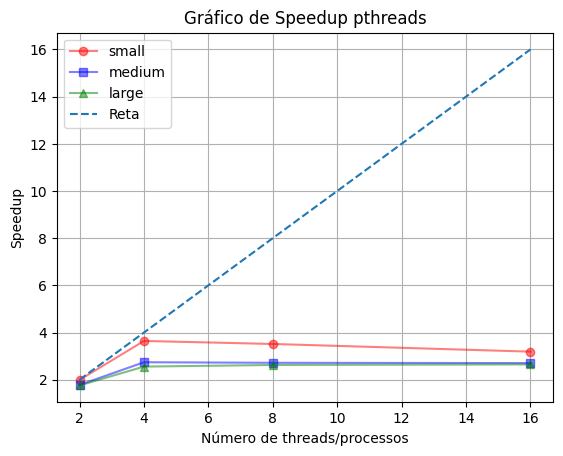

In [13]:
plt.plot(threads, speedups_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup pthreads')
plt.grid(True)
plt.legend()
plt.show()

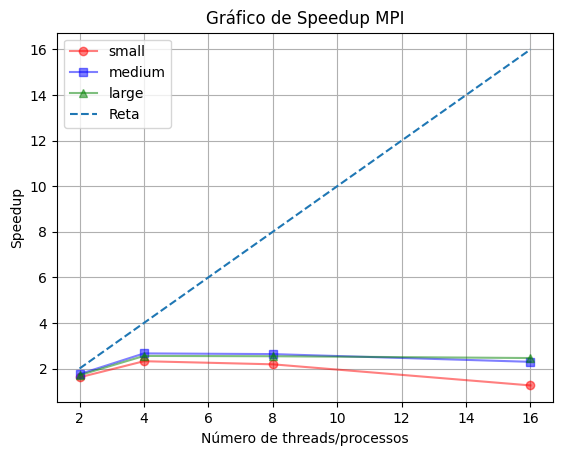

In [14]:
plt.plot(threads, speedups_mpi[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads, speedups_mpi[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads, speedups_mpi[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads, threads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI')
plt.grid(True)
plt.legend()
plt.show()

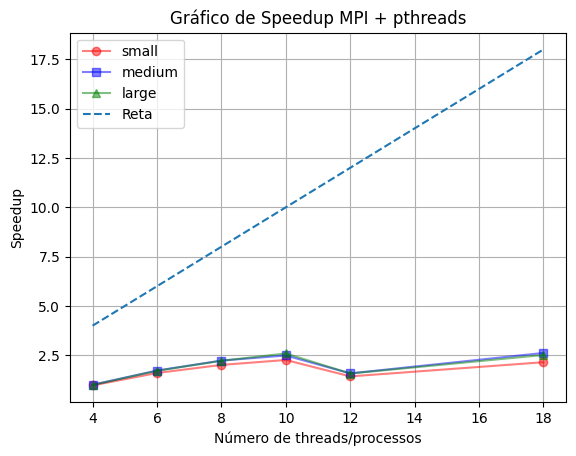

In [15]:
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[0], label='small', color='red', marker='o', alpha=0.5)
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[1], label='medium', color='blue', marker='s', alpha=0.5)
plt.plot(threads_mpi_pthreads, speedups_mpi_pthreads[2], label='large', color='green', marker='^', alpha=0.5)

plt.plot(threads_mpi_pthreads, threads_mpi_pthreads, linestyle='--', label='Reta')

plt.xlabel('Número de threads/processos')
plt.ylabel('Speedup')
plt.title('Gráfico de Speedup MPI + pthreads')
plt.grid(True)
plt.legend()
plt.show()